In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, roc_auc_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:

df = pd.read_csv("fraud_reduced.csv", index_col=0)

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33, stratify=y)

In [30]:

param_grid = {
    'n_estimators': [80, 100],
    'learning_rate': [0.1, 0.5,1],
    'algorithm': ['SAMME.R'],
    'sampling_strategy' : [0.05,0.005]
}

rnd_clf = RUSBoostClassifier()
param_search = GridSearchCV(
    rnd_clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=None),  # Cross-validation strategy
    n_jobs=1,  # Use all available CPU cores
    scoring = make_scorer(f1_score),
    verbose=2
)



param_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.05; total time=   5.3s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.05; total time=   5.2s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.05; total time=   5.5s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.05; total time=   5.5s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.05; total time=   5.4s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.005; total time=  13.9s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.005; total time=  14.2s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strategy=0.005; total time=  14.2s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=80, sampling_strateg

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RUSBoostClassifier(), n_jobs=1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [80, 100],
                         'sampling_strategy': [0.05, 0.005]},
             scoring=make_scorer(f1_score), verbose=2)

In [31]:
param_search.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 80,
 'sampling_strategy': 0.005}

In [32]:
cvres = param_search.cv_results_
results = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_score"], cvres["params"])]
results.sort(reverse=True, key=lambda x: x[0])
for mean_score, params in results:
    print("ROC AUC", mean_score, "-", "Parameters:", params)

ROC AUC 0.8131757936507936 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 80, 'sampling_strategy': 0.005}
ROC AUC 0.8126891200717793 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100, 'sampling_strategy': 0.005}
ROC AUC 0.8094367447396559 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 80, 'sampling_strategy': 0.005}
ROC AUC 0.7868762808796841 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100, 'sampling_strategy': 0.005}
ROC AUC 0.7770877156665377 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100, 'sampling_strategy': 0.005}
ROC AUC 0.770095210928827 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 80, 'sampling_strategy': 0.005}
ROC AUC 0.7134493526898591 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 80, 'sampling_strategy': 0.05}
ROC AUC 0.7032611577551923 - Parameters: {'algorith

In [33]:
param_search.best_estimator_

RUSBoostClassifier(learning_rate=0.5, n_estimators=80, sampling_strategy=0.005)

In [34]:
clf_rnd = param_search.best_estimator_

In [35]:
clf_rnd = param_search.best_estimator_

In [36]:
y_pred = clf_rnd.predict(X_test)

[[93808    17]
 [   48   114]]


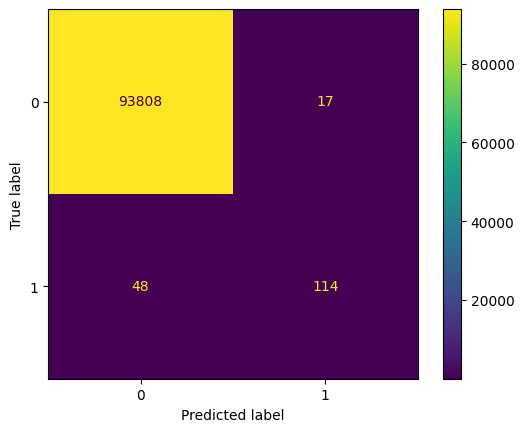

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rnd.classes_)
disp.plot()

In [22]:
y_pred = clf_rnd.predict(X_test)

# Calculate and display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.27      0.83      0.41       162

    accuracy                           1.00     93987
   macro avg       0.63      0.91      0.70     93987
weighted avg       1.00      1.00      1.00     93987



In [38]:
import joblib

joblib.dump(value= clf_rnd, filename='RUSboost.pkl')

['RUSboost.pkl']